# Dispa-SET Post-processing

In [1]:
%matplotlib inline
from __future__ import division
import sys
sys.path.append("..")  

import matplotlib.pyplot as plt
import DispaSET as ds
import pandas as pd
import numpy as np

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx). Run first:
```
/dispacli.py -c ConfigFiles/ConfigCY.xlsx build simulate
```

In [2]:
path = '../Simulations/simulationCY/'

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [3]:
inputs,results = ds.get_sim_results(path=path,cache=False)

[WARNING ] (get_sim_results): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected C:\GAMS\win64\24.0 as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file ..\Simulations\simulationCY\Results.gdx took 0.0199999809265s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 0.0340001583099s


### Format the inputs as a dictionary of dataframes:

In [4]:
datain = ds.ds_to_df(inputs)

## Extract heat parameters and results

In [12]:
xx = np.linspace(0,220,3)
plant = '[20] - Vasilikos CCCP1'

capacity =  datain['PowerCapacity'].loc[plant].values
min_capacity = datain['PartLoadMin'].loc[plant].values * capacity
chp_a = datain['CHPPowerLossFactor'].loc[plant].values
chp_b = datain['CHPPowerToHeat'].loc[plant].values
max_heat = datain['CHPMaxHeat'].loc[plant].values

power = results['OutputPower'][plant]
heat = results['OutputStorageInput'][plant]

heattodemand = results['OutputHeat'][plant]

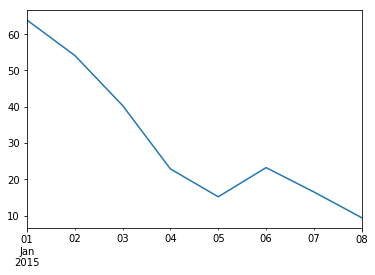

In [13]:
heat.resample('d').mean().plot()

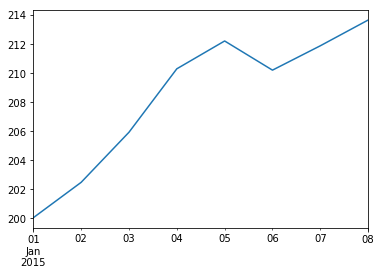

In [14]:
power.resample('d').mean().plot()

(0, 231.06998670622627)

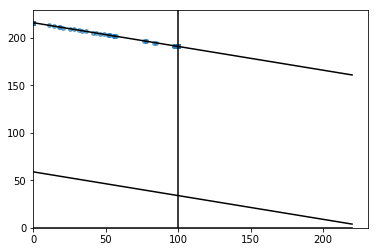

In [15]:
loss_line = lambda x: (capacity - chp_a * x)
hpr_line = lambda x: chp_b * x
min_loss_line = lambda x: (min_capacity - chp_a * x)

plt.plot(xx, loss_line(xx),'k')
plt.plot(xx, hpr_line(xx),'k')
plt.plot(xx, min_loss_line(xx),'k')
plt.axvline(max_heat,ymax=250,color='black')

plt.scatter(heat,power,s=15,alpha=.6)
plt.ylim(ymin=0)
plt.xlim(xmin=0)

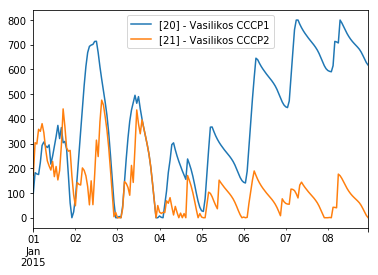

In [16]:
results['OutputStorageLevel'].plot()

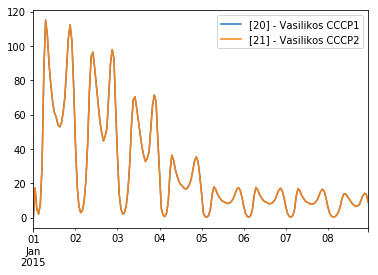

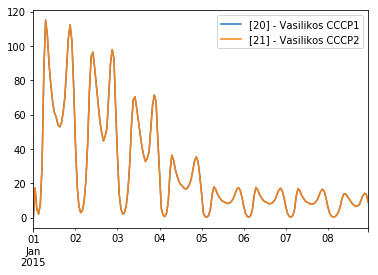

In [10]:
datain['HeatDemand'].plot()
results['OutputHeat'].plot()

In [11]:
results['OutputHeatSlack']

""
2015-01-01 00:00:00
2015-01-01 01:00:00
2015-01-01 02:00:00
2015-01-01 03:00:00
2015-01-01 04:00:00
2015-01-01 05:00:00
2015-01-01 06:00:00
2015-01-01 07:00:00
2015-01-01 08:00:00
2015-01-01 09:00:00
